## IMPORT LIBRARIES AND DATASETS

In [130]:
# install nltk
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [131]:
# install gensim
!pip install gensim


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [132]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [134]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [135]:
with open("resume.csv", "r", encoding="utf-8", errors="ignore") as file:
    resume_df = pd.read_csv(file)

In [136]:
resume_df.drop("resume_id",axis=1,inplace=True)

In [137]:
# data containing resume
resume_df

,class,resume_text
0,not_flagged,\nCustomer Service Supervisor/Tier - Isabella ...
1,not_flagged,\nEngineer / Scientist - IBM Microelectronics ...
2,not_flagged,\nLTS Software Engineer Computational Lithogra...
3,not_flagged,TUTOR\nWilliston VT - Email me on Indeed: ind...
4,flagged,\nIndependent Consultant - Self-employed\nBurl...
...,...,...
120,not_flagged,\nBrattleboro VT - Email me on Indeed: indeed....
121,not_flagged,\nResearch and Teaching Assistant - University...
122,not_flagged,\nMedical Coder - Highly Skilled - Entry Level...
123,flagged,\nWaterbury VT - Email me on Indeed: indeed.co...


MINI CHALLENGE #1: 
- Print the first and last elements in the dataframe. 

In [138]:
resume_df.head(10)

,class,resume_text
0,not_flagged,\nCustomer Service Supervisor/Tier - Isabella ...
1,not_flagged,\nEngineer / Scientist - IBM Microelectronics ...
2,not_flagged,\nLTS Software Engineer Computational Lithogra...
3,not_flagged,TUTOR\nWilliston VT - Email me on Indeed: ind...
4,flagged,\nIndependent Consultant - Self-employed\nBurl...
5,not_flagged,\nPoultney VT - Email me on Indeed: indeed.com...
6,not_flagged,\nMedical Laboratory Scientist (Special Chemis...
7,flagged,Statistician\nBurlington VT - Email me on Inde...
8,not_flagged,Research technician\nBurlington VT - Email me ...
9,not_flagged,Barbara Hennessey-Elzohairy\nNewport VT - Emai...


## PERFORM EXPLORATORY DATA ANALYSIS

In [139]:
# obtain dataframe information
resume_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        125 non-null    object
 1   resume_text  125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [140]:
# check for null values
resume_df.isnull().sum()


class          0
resume_text    0
dtype: int64

In [141]:
resume_df["class"].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [142]:
resume_df["class"]=resume_df["class"].apply(lambda x:0 if x=='flagged'else 1)
resume_df["class"].value_counts()

1    92
0    33
Name: class, dtype: int64

MINI CHALLENGE #2:
- Divide the DataFrame into two, one that belongs to class 0 and 1. Do we have a balanced dataset?

In [143]:
class_1=resume_df[resume_df['class']==1]
class_0=resume_df[resume_df['class']==0]
print(class_1.head(5))
print(class_0.head(5))

   class                                        resume_text
0      1  \nCustomer Service Supervisor/Tier - Isabella ...
1      1  \nEngineer / Scientist - IBM Microelectronics ...
2      1  \nLTS Software Engineer Computational Lithogra...
3      1   TUTOR\nWilliston VT - Email me on Indeed: ind...
5      1  \nPoultney VT - Email me on Indeed: indeed.com...
    class                                        resume_text
4       0  \nIndependent Consultant - Self-employed\nBurl...
7       0  Statistician\nBurlington VT - Email me on Inde...
10      0  Barbara Kurth\nResearch Assistant Professor Cl...
15      0  Caroline Clauson Work Study Student\nBrattlebo...
17      0  Chelsea Martin\nEnvironmental Scientist - Vana...


## PERFORM DATA CLEANING

In [144]:
resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x.replace('\r', '').replace('\n', ''))
resume_df

,class,resume_text
0,1,Customer Service Supervisor/Tier - Isabella Ca...
1,1,Engineer / Scientist - IBM Microelectronics Di...
2,1,LTS Software Engineer Computational Lithograph...
3,1,TUTORWilliston VT - Email me on Indeed: indee...
4,0,Independent Consultant - Self-employedBurlingt...
...,...,...
120,1,Brattleboro VT - Email me on Indeed: indeed.co...
121,1,Research and Teaching Assistant - University o...
122,1,Medical Coder - Highly Skilled - Entry LevelSu...
123,0,Waterbury VT - Email me on Indeed: indeed.com/...


In [145]:
# download nltk packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [146]:
# download nltk packages
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [147]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use','email','com'])

In [148]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

## This preprocess function is designed to clean and process text data by:

Tokenizing: Breaking down the text into individual words, or tokens, using gensim.utils.simple_preprocess(text).

Filtering Stopwords: Removing common but uninformative words, called "stopwords," such as "the," "and," and "in." This is done with both Gensim’s built-in stopword list (gensim.parsing.preprocessing.STOPWORDS) and an additional list stop_words.

Filtering Short Words: Only keeping words longer than two characters, as very short words (e.g., "a" or "is") are often uninformative.

Reconstructing Text: Joining the cleaned words back together into a single string separated by spaces.
Here’s a step-by 

In [149]:
resume_df['cleaned']=resume_df['resume_text'].apply(preprocess)

In [150]:
print(resume_df['cleaned'][0])

customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research proj

In [151]:
print(resume_df['resume_text'][0])

Customer Service Supervisor/Tier - Isabella Catalog CompanySouth Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26WORK EXPERIENCECustomer Service Supervisor/TierIsabella Catalog Company - Shelburne VT - August 2015 to Present2 Customer Service/Visual Set Up & Display/Website Maintenance Supervise customer service team of a popular catalog company Manage day to day issues and resolution of customer upset to ensure customer satisfaction Troubleshoot order and shipping issues: lost in transit order errors damages Manage and resolve escalated customer calls to ensure customer satisfaction Assist customers with order placing cross-selling/upselling of catalog merchandise Set up and display of sample merchandise in catalog library as well as customer pick-up area of the facility  Website clean-up: adding images type up product information proofreadingAdministrative Assistant /Events Coordinator/Office Services AssistantEileen Fisher Inc - Irvington NY - February 2014 to July

In [152]:
resume_df['class'].value_counts()

1    92
0    33
Name: class, dtype: int64

# TASK #5: VISUALIZE CLEANED DATASET

<AxesSubplot: xlabel='class', ylabel='count'>

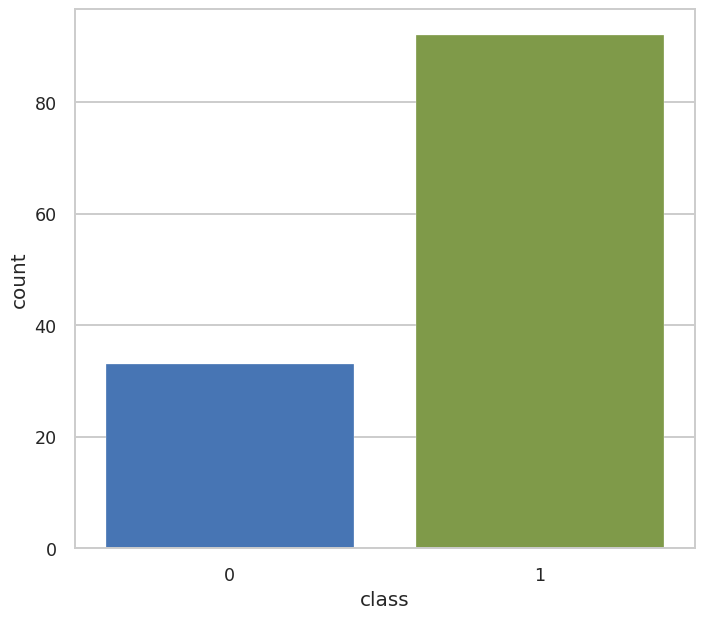

In [153]:
# Plot the counts of flagged vs not flagged
sns.set_style("whitegrid")
sns.countplot(data=resume_df, x='class')


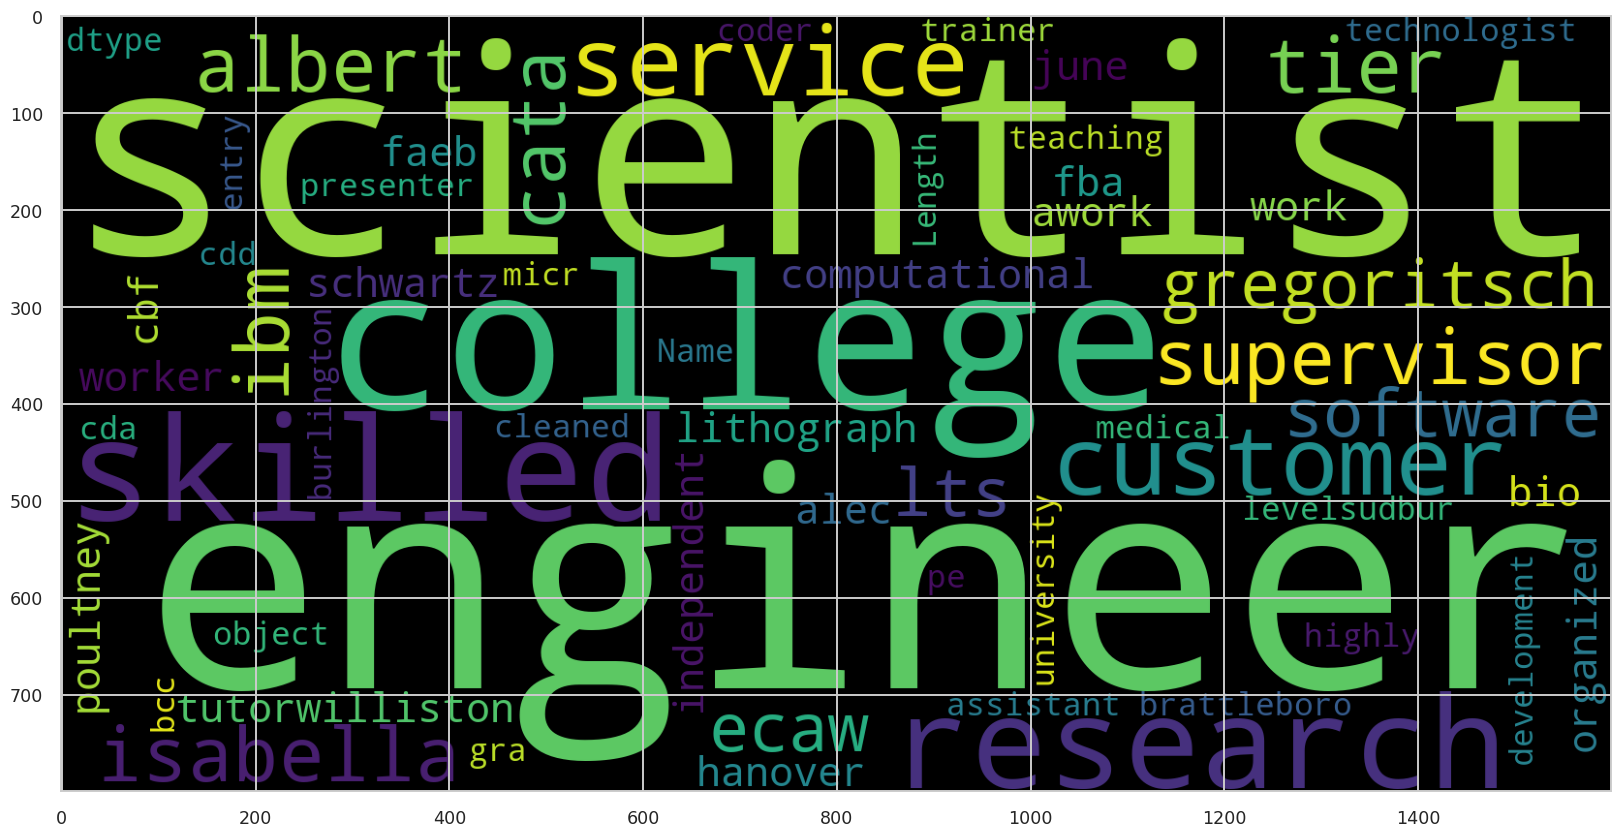

In [154]:
# plot the word cloud for text that is flagged
plt.figure(figsize = (20,20)) 
wc=WordCloud(max_words=2000,width=1600,height=800,stopwords=stop_words).generate(str(resume_df[resume_df['class']==1].cleaned))
plt.imshow(wc)

MINI CHALLENGE #3:
- Plot the wordcloud for class #1 

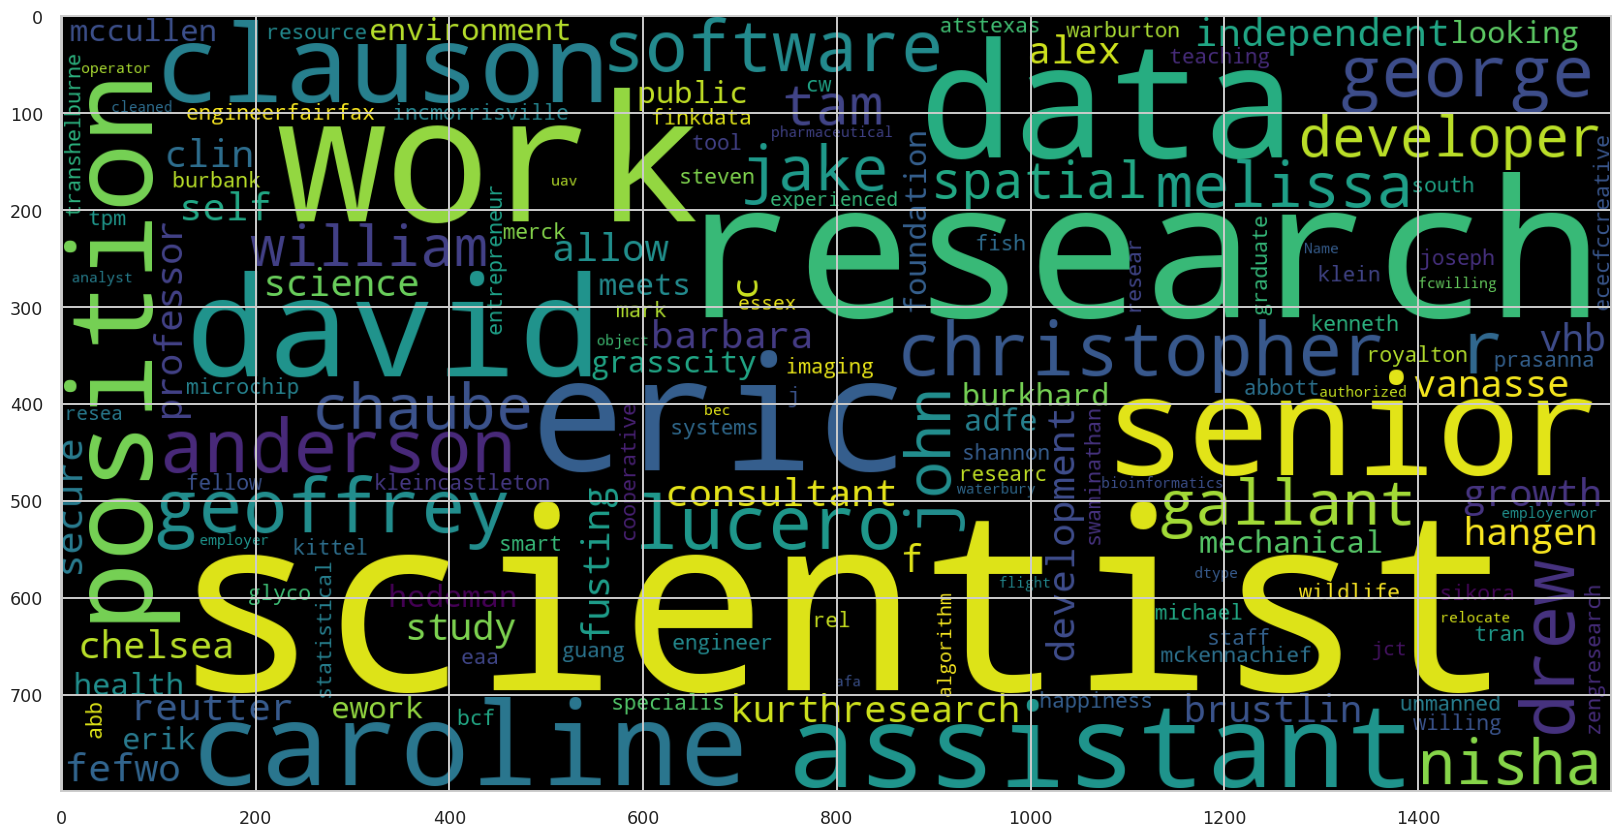

In [155]:
plt.figure(figsize = (20,20)) 
wc=WordCloud(max_words=2000,width=1600,height=800,stopwords=stop_words).generate(str(resume_df[resume_df['class']==0].cleaned))
plt.imshow(wc)

## PREPARE THE DATA BY APPLYING COUNT VECTORIZER

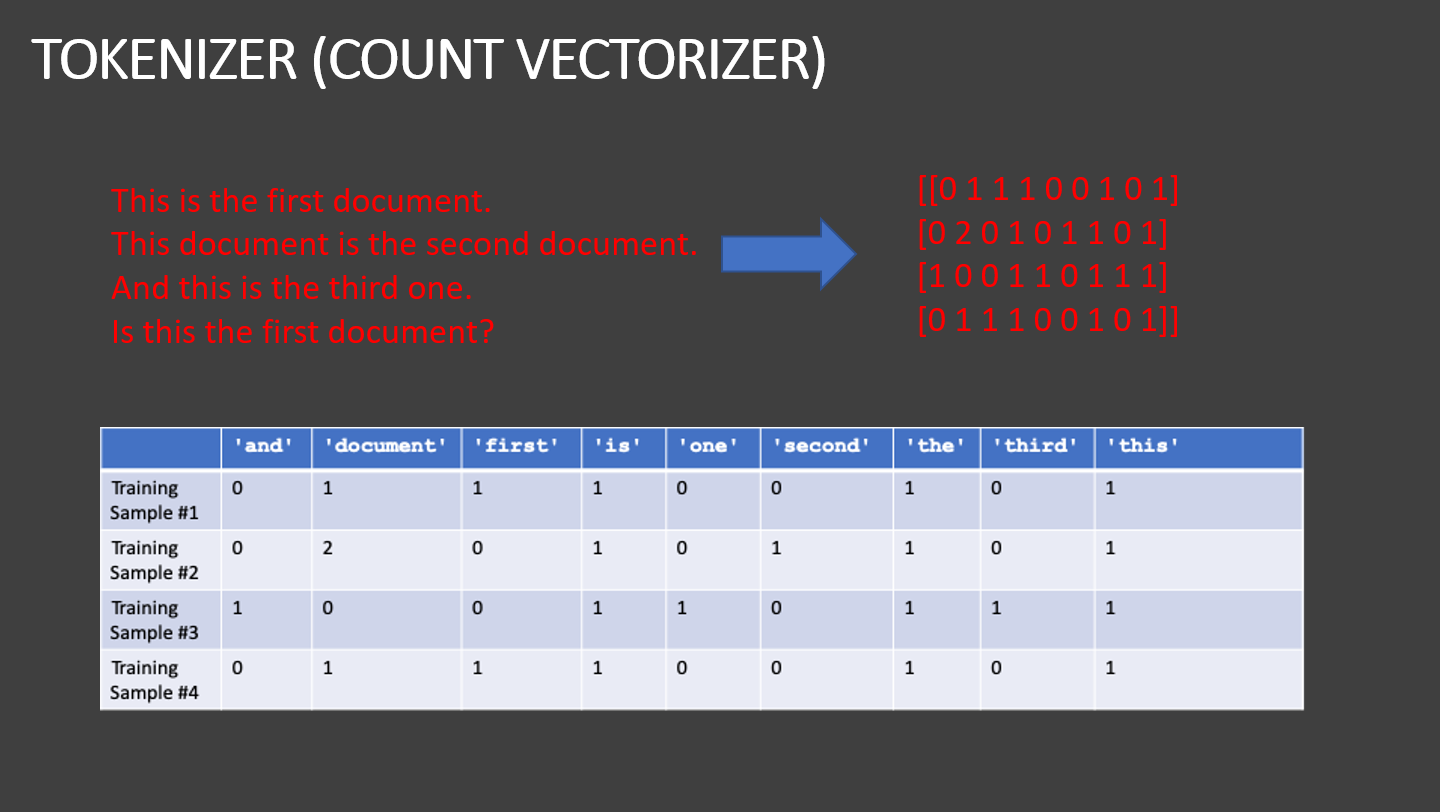

In [156]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
vectorization=CountVectorizer()
cc=vectorization.fit_transform(sample_data)

In [157]:
print(vectorization.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [158]:
print(cc.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [159]:
# Applying CountVectorier to the cleaned text
vector=CountVectorizer()
cv=vector.fit_transform(resume_df['cleaned'])

In [160]:
vector.get_feature_names_out()

array(['aaalac', 'aabb', 'aac', ..., 'zosia', 'zudaձnez', 'zurima'],
      dtype=object)

In [161]:
cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## TRAIN NAIVE BAYES CLASSIFIER MODEL

In [162]:
x=cv

In [163]:
y=resume_df['class']

In [164]:
x.shape

(125, 11325)

In [165]:
y.shape

(125,)

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25)

In [168]:
from sklearn.naive_bayes import MultinomialNB

In [169]:
naive= MultinomialNB()
naive.fit(x_train,y_train)

MultinomialNB()

## ASSESS TRAINED MODEL PERFORMANCE


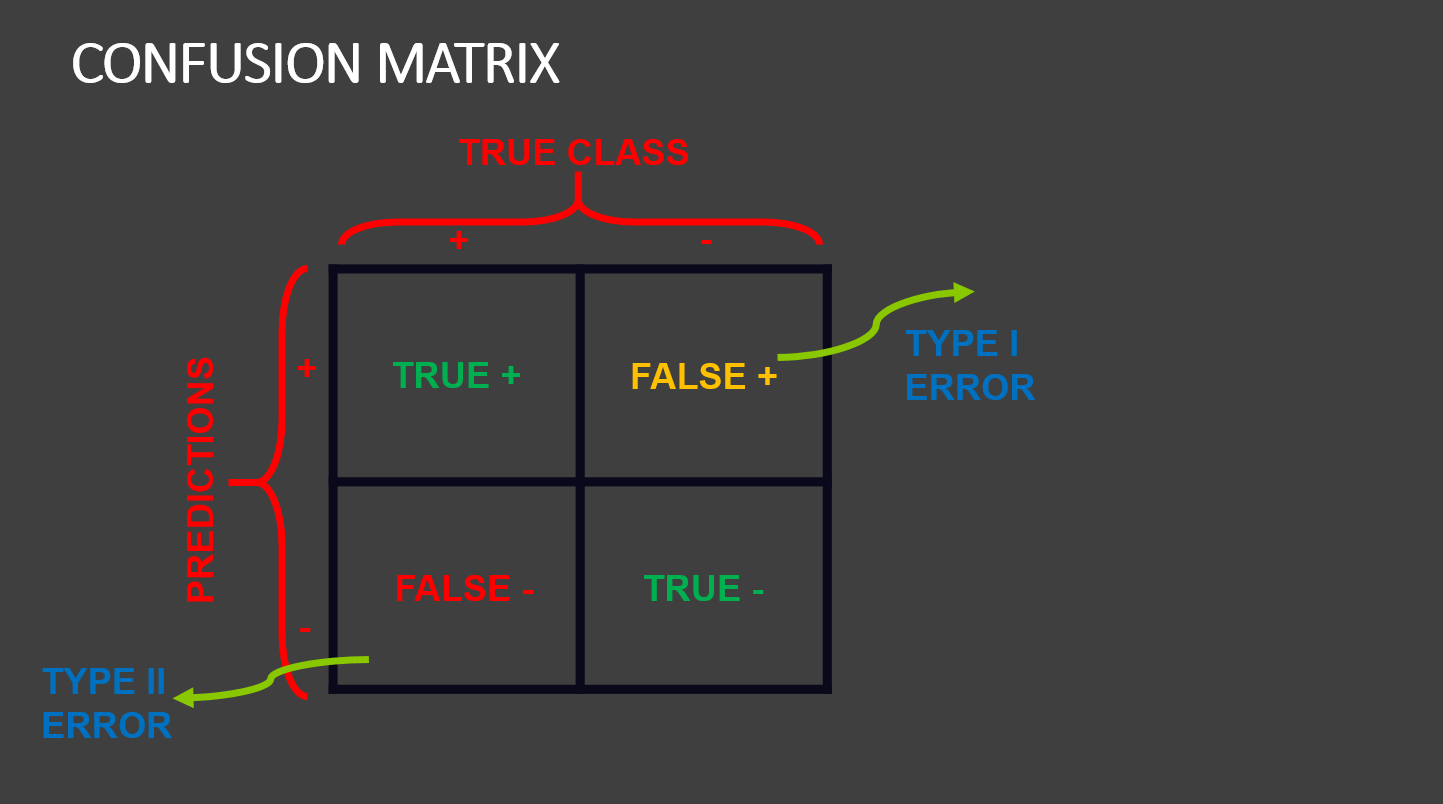

Training Accuracy: 1.0


<AxesSubplot: >

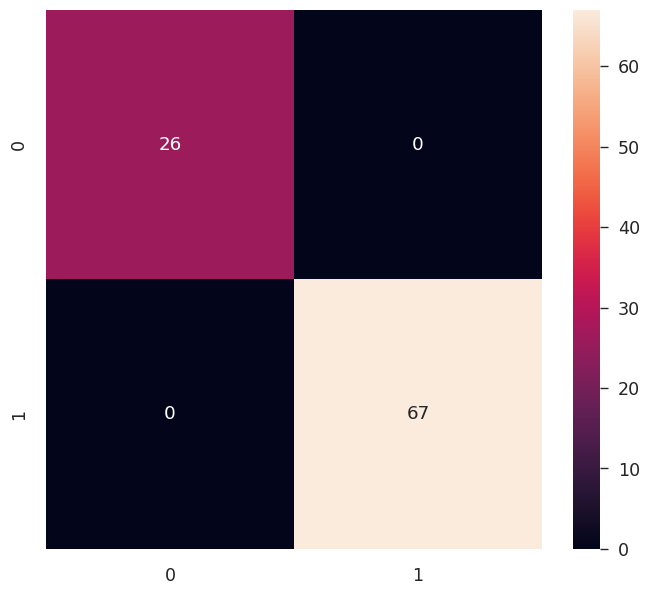

In [170]:
# Predicting the performance on train data
y_predict_train = naive.predict(x_train)
print("Training Accuracy:", naive.score(x_train, y_train))
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

Testing accuracy: 0.8125


<AxesSubplot: >

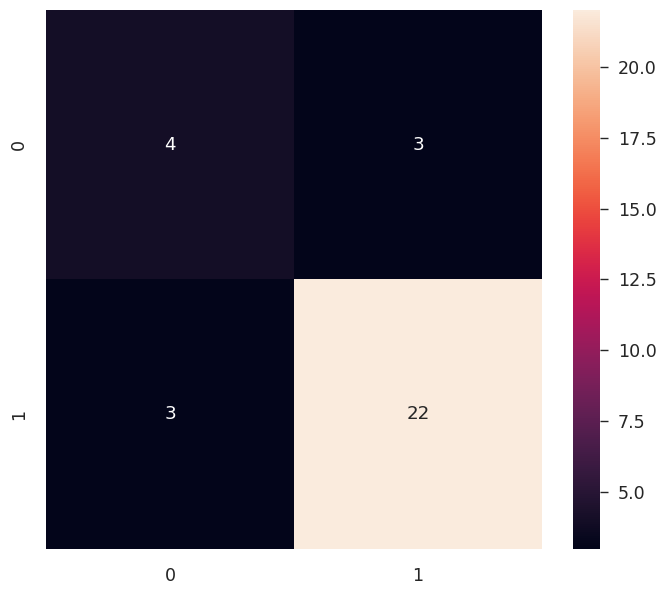

In [171]:
# Predicting the performance on test data
y_predict_test = naive.predict(x_test)
print("Testing accuracy:", naive.score(x_test, y_test))
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [ ]:
Thank you ;)